In [1]:
# Pacotes para manipulação dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pacotes nativos do python
from glob import glob
import re

In [2]:
# Definindo fonte das informações
SOURCE = r'./bd_prograd01'
FILES = glob(SOURCE+'/bd_prograd01_*.csv')

In [3]:
# Extração, formatação e limpeza da base
df = pd.concat([pd.read_csv(_file, sep=';', encoding='latin', dtype='str').\
                assign(ano_arquivo = re.search('bd_prograd01_(\d{4}).csv', _file)[1])
                for _file in FILES], ignore_index=True)

df.nota = df.nota.str.replace(',', '.').astype('float64')

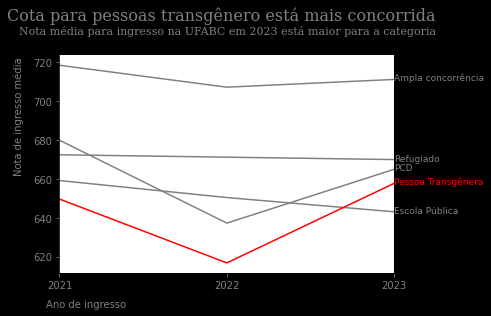

<Figure size 432x288 with 0 Axes>

In [73]:
df1 = df.query('ano_arquivo > "2020" and `status de matrícula` == "Matriculado(a)"')\
      .assign(modalidade = df['modalidade convocação'].str.extract('\S* - (?P<c>[^\+]*)').c.str.rstrip())\
      .groupby(['ano_arquivo', 'modalidade'])[['nota']].mean().reset_index()

fig, ax = plt.subplots(facecolor='white')

last_year = df1.ano_arquivo.max()

for tipo_concorrencia in df1.modalidade.unique():
  c1 = 'red' if tipo_concorrencia == 'Pessoa Transgênera' else 'gray'
  ax.plot('ano_arquivo', 'nota', label=tipo_concorrencia, c=c1,
          data=df1.query('modalidade == @tipo_concorrencia'))
  ax.text(last_year,
          df1.query('ano_arquivo == @last_year and modalidade == @tipo_concorrencia').nota - 0.6,
          tipo_concorrencia, size=9, c=c1)

ax.set(xlabel = 'Ano Ingresso', ylabel='Nota Média',
       xlim = ("2021", last_year)
      )

font1 = {'family':'serif','color':'gray'}
fig.suptitle('''Cota para pessoas transgênero está mais concorrida''',
             fontdict = font1, x=0.5, y=1.05, size=16)

ax.set_title('''Nota média para ingresso na UFABC em 2023 está maior para a categoria''',
             fontdict = font1, loc='left', x=-0.12, y=1.07, size=11)

ax.yaxis.label.set_color('gray')
ax.xaxis.label.set_color('gray')
ax.tick_params(colors='gray')
ax.set_ylabel('Nota de ingresso média', ha='left', y=0.45, rotation=90, labelpad=9)
ax.set_xlabel('Ano de ingresso', ha='left', x=-0.04, rotation=0, labelpad=9)

ax.spines[['right', 'top']].set_visible(False)
# ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show();